# Welter
## Issue 27: Re-run all the H-band spectra with expanded Teff range
### Part III: Make some violin plots for the paper

gully  
July 29, 2016

## Violin plot

In [1]:
import pandas as pd

In [2]:
vdf = pd.DataFrame()

In [3]:
bases = ['Teff', 'logg', 'FeH', 'vz', 'vi', 'logO', 'c1', 'c2', 'c3', 'SA', 'LA',
         'll', 'Teff2', 'logO2']

In [4]:
n_s = 200

In [5]:
base_dict = {'FeH': 2,
 'LA': 12,
 'SA': 11,
 'Teff': 0,
 'Teff2': 6,
 'c1': 8,
 'c2': 9,
 'c3': 10,
 'll': 13,
 'logO': 5,
 'logO2': 7,
 'logg': 1,
 'vi': 4,
 'vz': 3}

In [6]:
ms = np.arange(100, 123+1)

In [7]:
ms = ms[ms != 107]

In [8]:
ms

array([100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123])

### Run01 of the mixture model for both H and K bands

In [9]:
ms = np.arange(72, 94+1)

In [10]:
total_vdf = pd.DataFrame()
for m in ms:
    try:
        ws = np.load("../sf/m{:03d}/output/mix_emcee/run01/emcee_chain.npy".format(m))
        gi = ws[0,:,0] != 0.0
        #print("Order {}: {} samples".format(m, gi.sum()))
        ws = ws[:,gi,:]
        burned = ws[:, -1*n_s:,:]
        xs, ys, zs = burned.shape
        fc = burned.reshape(xs*ys, zs)
        bb = 10**fc[:,7] / ( 10**fc[:,5] + 10**fc[:,7] )
        for base in bases:
            vdf[base] = fc[:,base_dict[base]]
        vdf['ff'] = bb
        vdf['m_val'] = m
        total_vdf = total_vdf.append(vdf, ignore_index=True)
    except:
        print("Order {}: FAIL".format(m))

In [11]:
total_vdf_run01 = total_vdf

### Run02 of the mixture model for H band

In [12]:
ms = np.hstack((np.arange(100, 111), np.arange(112,123+1)))

In [13]:
total_vdf = pd.DataFrame()
for m in ms:
    try:
        ws = np.load("../sf/m{:03d}/output/mix_emcee/run02/emcee_chain.npy".format(m))
        gi = ws[0,:,0] != 0.0
        print("Order {}: {} samples".format(m, gi.sum()))
        ws = ws[:,gi,:]
        burned = ws[:, -1*n_s:,:]
        xs, ys, zs = burned.shape
        fc = burned.reshape(xs*ys, zs)
        bb = 10**fc[:,7] / ( 10**fc[:,5] + 10**fc[:,7] )
        for base in bases:
            vdf[base] = fc[:,base_dict[base]]
        vdf['ff'] = bb
        vdf['m_val'] = m
        total_vdf = total_vdf.append(vdf, ignore_index=True)
    except:
        print("Order {}: FAIL".format(m))

Order 100: 5000 samples
Order 101: 5000 samples
Order 102: 5000 samples
Order 103: 5000 samples
Order 104: 5000 samples
Order 105: 5000 samples
Order 106: 5000 samples
Order 107: 5000 samples
Order 108: 5000 samples
Order 109: 4200 samples
Order 110: 5000 samples
Order 112: 5000 samples
Order 113: 5000 samples
Order 114: 5000 samples
Order 115: 5000 samples
Order 116: 5000 samples
Order 117: 5000 samples
Order 118: 5000 samples
Order 119: 5000 samples
Order 120: 5000 samples
Order 121: 5000 samples
Order 122: 5000 samples
Order 123: 5000 samples


In [14]:
total_vdf_run02 = total_vdf

In [15]:
total_vdf_run01 = total_vdf_run01.sort_values("m_val", ascending=False)

In [16]:
total_vdf = pd.concat([total_vdf_run01, total_vdf_run02], ignore_index=True)

In [17]:
total_vdf = total_vdf.sort_values("m_val", ascending=False)

## Add central wavelength metadata to the axes labels

In [18]:
ig_ord = pd.read_csv('../data/analysis/IGRINS_mix_emcee_last200.csv', usecols=['m_val', 'wl_center'])

In [19]:
total_vdf = pd.merge(total_vdf, ig_ord, on='m_val')

## Split orders into reliable and unreliable

In [20]:
m_assess = pd.read_csv('../data/IGRINS_orders_outcome/order_assessment-table0.csv')

In [21]:
m_assess.head()

,id,m_order,Run,Use
0,1,72,run01,Y
1,2,73,run01,Y
2,3,74,run01,N
3,4,75,run01,N
4,5,76,run01,N


In [22]:
gi = m_assess.Use == 'Y'
bi = m_assess.Use == 'N'
gm, bm = m_assess.m_order[gi].values, m_assess.m_order[bi].values

In [23]:
gi.sum(), bi.sum(), len(m_assess)

(28, 19, 47)

In [24]:
g_vdf_i = total_vdf.m_val.isin(gm)
b_vdf_i = total_vdf.m_val.isin(bm)

In [25]:
g_vdf, b_vdf = total_vdf.copy(), total_vdf.copy()

#### This is a total hack because I don't want to figure out how Violin plots actually work!!

In [26]:
g_vdf.Teff[b_vdf_i] = np.random.normal(size=b_vdf_i.sum())
b_vdf.Teff[g_vdf_i] = np.random.normal(size=g_vdf_i.sum())
g_vdf.Teff2[b_vdf_i] = np.random.normal(size=b_vdf_i.sum())
b_vdf.Teff2[g_vdf_i] = np.random.normal(size=g_vdf_i.sum())
g_vdf.ff[b_vdf_i] = np.random.normal(-100, size=b_vdf_i.sum())
b_vdf.ff[g_vdf_i] = np.random.normal(-100, size=g_vdf_i.sum())

//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:4: Sett

In [27]:
sns.set_context('paper', font_scale=1.0)
sns.set_style('ticks')

In [28]:
gm.shape, bm.shape

((28,), (19,))

In [29]:
vec1 = ["{}".format(np.int(val)) for val in g_vdf.wl_center.unique()]
vec2 = g_vdf.m_val.unique()

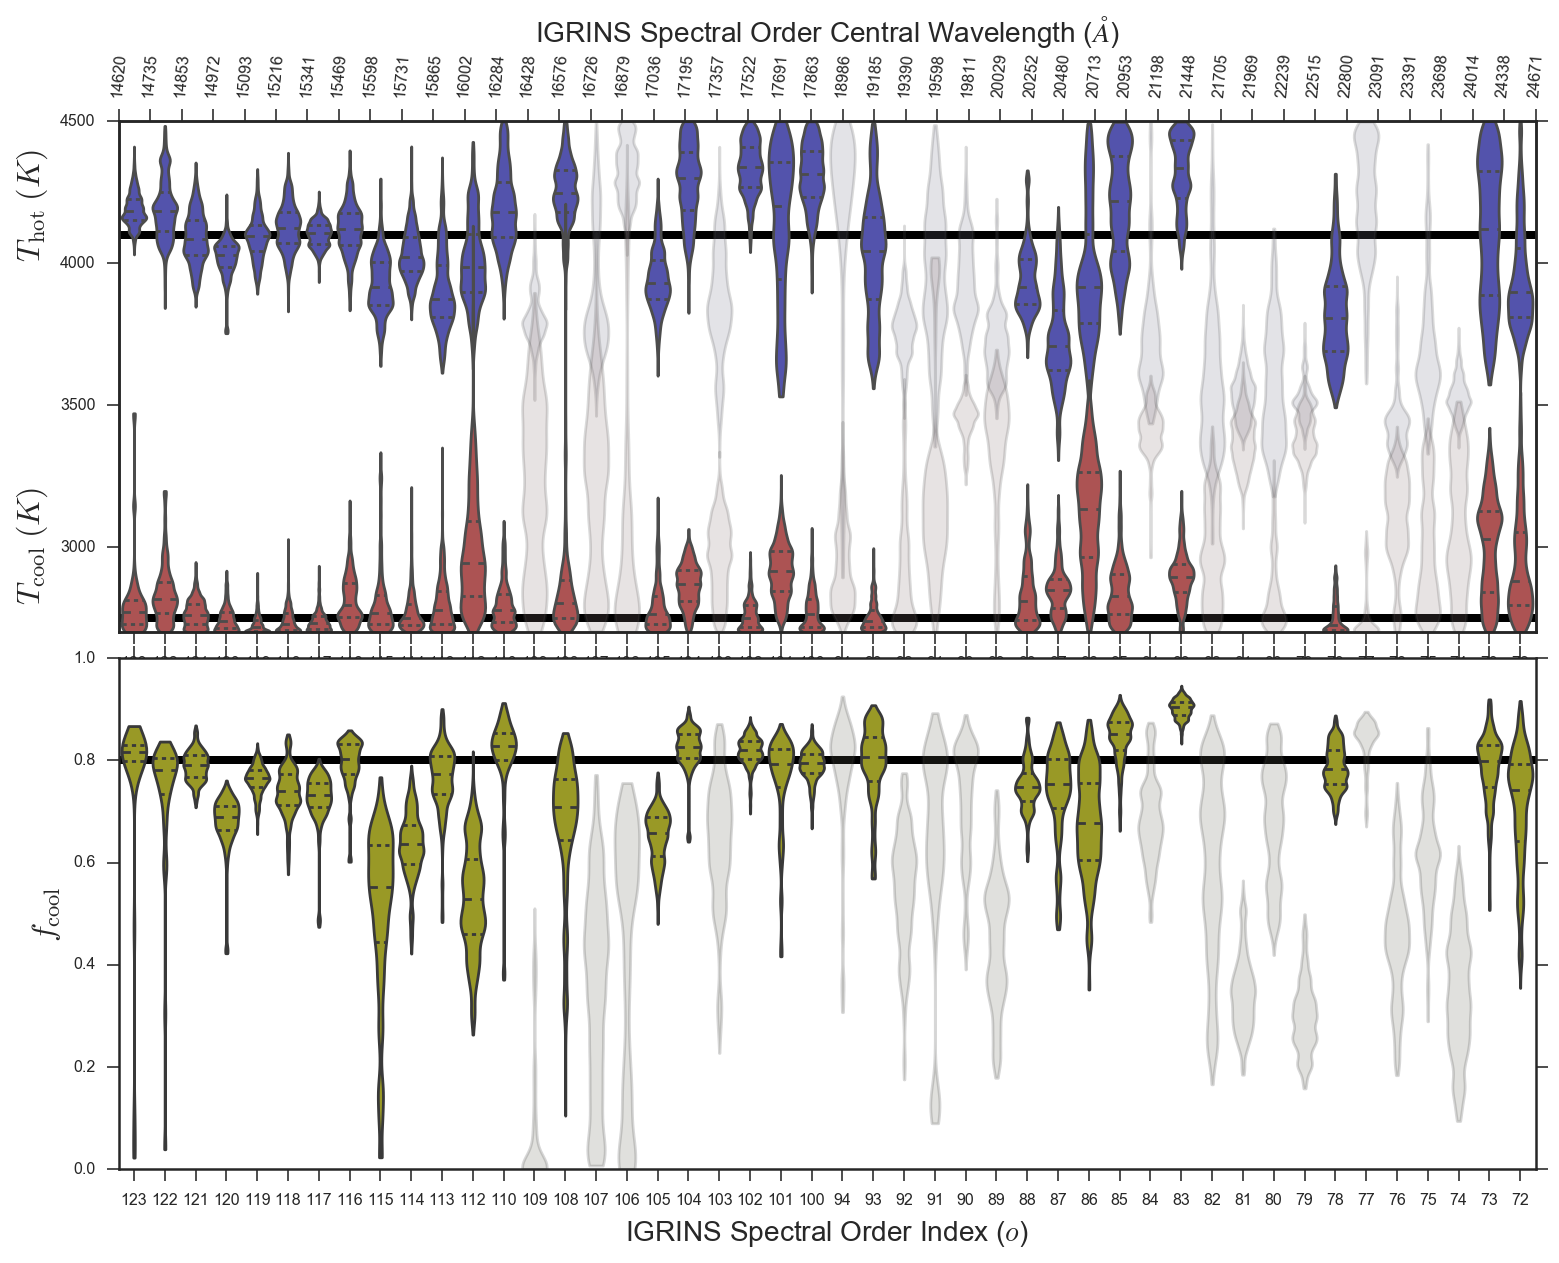

In [37]:
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(hspace=0.05, bottom=0.03, top=0.94, left=0.12, right=0.94)

ax1 = fig.add_subplot(211)

## Bogus orders
g = sns.violinplot(x="m_val", y="Teff", data=b_vdf, cut=0, scale='width', inner=None,
                   color='b', saturation=0.09, ax=ax1, order=total_vdf.m_val.unique(), alpha=0.1)
for this_col in g.axes.collections:
    this_col.set_alpha(0.2)

g2 = sns.violinplot(x="m_val", y="Teff2", data=b_vdf, cut=0, scale='width', inner=None,
                   color='r', saturation=0.09, ax=ax1, order=total_vdf.m_val.unique(), alpha=0.1)
for this_col in g2.axes.collections:
    this_col.set_alpha(0.2)
    
## Best guess
    
teffa = 4100.0
ax1.axhline(teffa, linewidth=4, color='k', axes=ax1, zorder=0)

teffb = 2750.0
ax1.axhline(teffb, linewidth=4, color='k', axes=ax1, zorder=0)

## Good orders

sns.violinplot(x="m_val", y="Teff", data=g_vdf, cut=0, scale='width', inner='quartile',
                   color='b', saturation=0.35, ax=ax1, order=total_vdf.m_val.unique())

sns.violinplot(x="m_val", y="Teff2", data=g_vdf, cut=0, scale='width', inner='quartile',
                   color='r', saturation=0.35, ax=ax1, order=total_vdf.m_val.unique())

sns.axlabel(' ', ' ')
ax1.set_ylabel('$T_\mathrm{cool} \; (K) \qquad \qquad \qquad \qquad T_\mathrm{hot} \; (K)$', fontdict={"fontsize":16})
ax1.set_ylim(2700, 4500)
#ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax1b = ax1.twiny()

new_tick_locations = vec1

ax1b.set_xticks(ax1.get_xticks())
ax1b.set_xticklabels(new_tick_locations, rotation=85)
ax1b.set_xlabel(r"IGRINS Spectral Order Central Wavelength ($\AA$)", fontsize=14)

## Fill factor

ax2 = fig.add_subplot(212)

g3 = sns.violinplot(x="m_val", y="ff", data=b_vdf, cut=0, scale='width', inner=None,
                   color='y', saturation=0.09, ax=ax2, order=total_vdf.m_val.unique(), alpha=0.1)
for this_col in g3.axes.collections:
    this_col.set_alpha(0.2)
    
ff_guess = 0.80
ax2.axhline(ff_guess, linewidth=4, color='k', axes=ax2, zorder=0)

sns.violinplot(x="m_val", y="ff", data=g_vdf, cut=0, scale='width', inner='quartile',
                   color='y', saturation=0.6, ax=ax2, order=total_vdf.m_val.unique())
ax2.set_xlabel('IGRINS Spectral Order Index ($o$)', fontdict={"fontsize":14})
ax2.set_ylabel('$f_\mathrm{cool}$', fontdict={"fontsize":16})
ax2.set_ylim(0, 1)

plt.savefig('../document/figures/violin_Teff_fill_order.pdf', bbox_inches='tight')

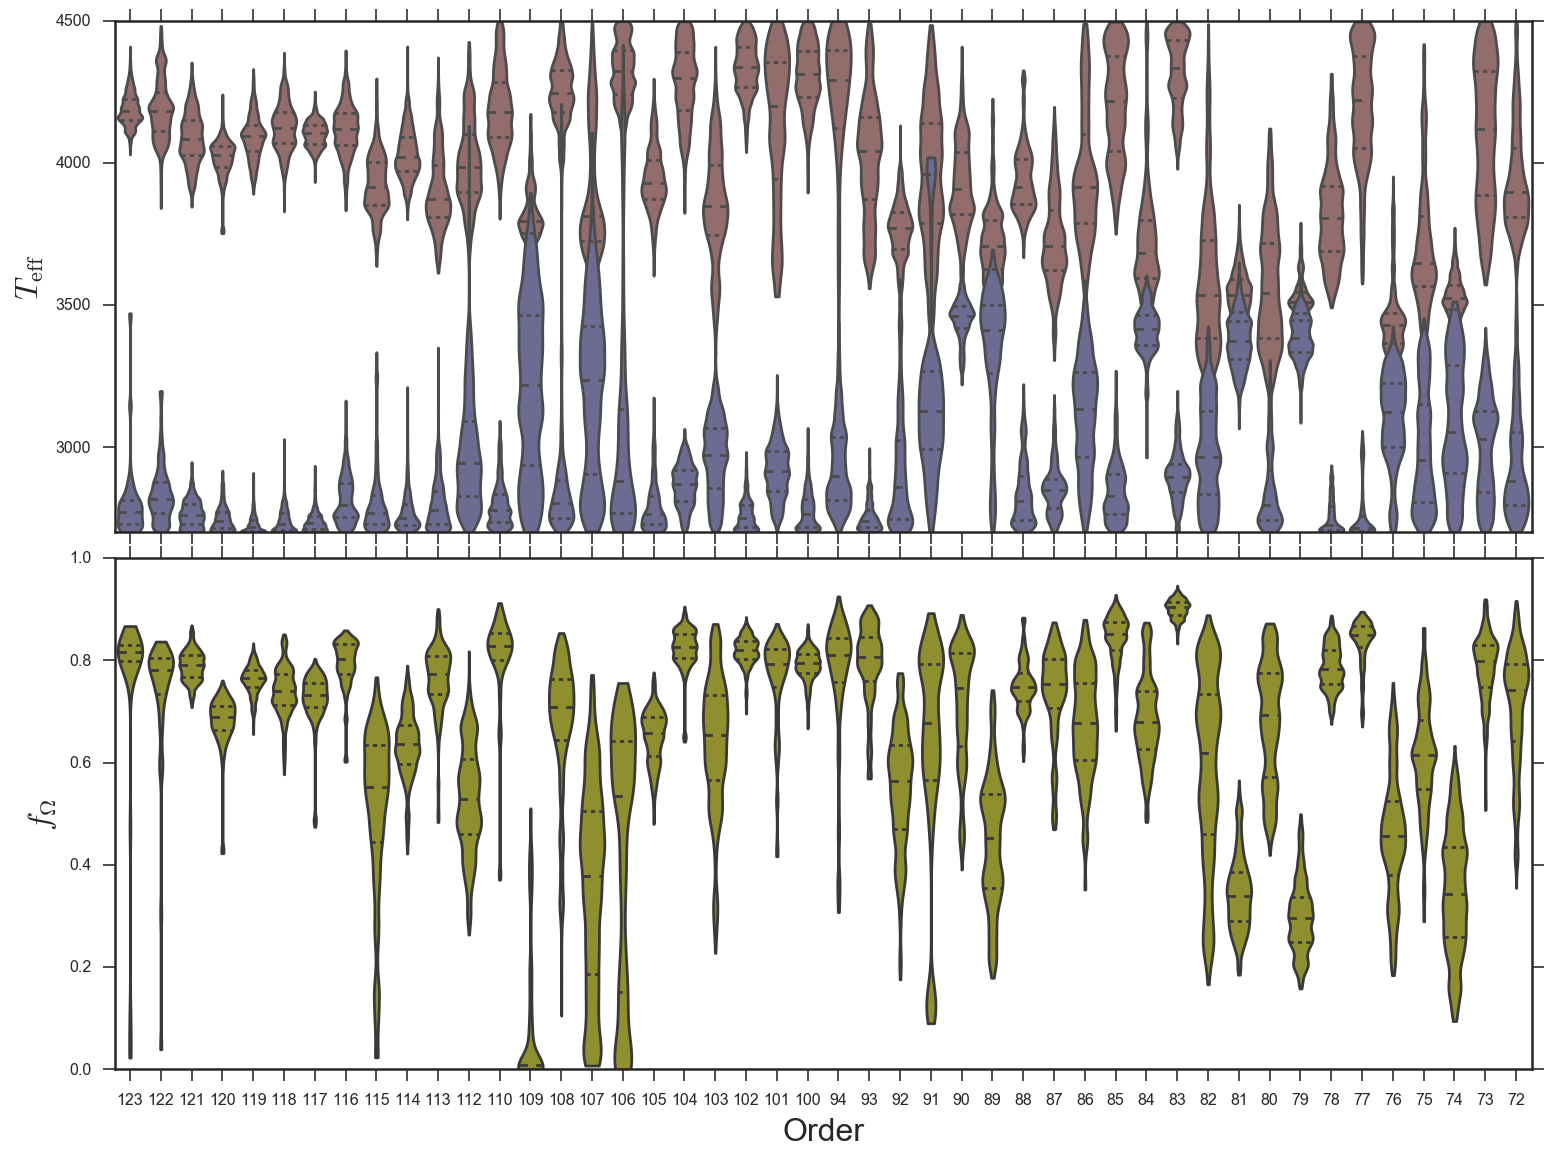

In [70]:
fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(hspace=0.05, bottom=0.03, top=0.94, left=0.12, right=0.94)

ax1 = fig.add_subplot(211)
sns.violinplot(x="m_val", y="Teff", data=total_vdf, cut=0, scale='width', inner='quartile',
                   color='r', saturation=0.15, ax=ax1, order=total_vdf.m_val.unique())
sns.violinplot(x="m_val", y="Teff2", data=total_vdf, cut=0, scale='width',inner='quartile',
                   color='b', saturation=0.15, ax=ax1, order=total_vdf.m_val.unique())
sns.axlabel(' ', ' ')
ax1.set_ylabel('$T_{\mathrm{eff}}$', fontdict={"fontsize":16})
ax1.set_ylim(2700, 4500)
ax1.xaxis.set_major_formatter(plt.NullFormatter())


ax2 = fig.add_subplot(212)
sns.violinplot(x="m_val", y="ff", data=total_vdf, cut=0, scale='width', inner='quartile',
                   color='y', saturation=0.5, ax=ax2, order=total_vdf.m_val.unique())
ax2.set_xlabel('Order', fontdict={"fontsize":16})
ax2.set_ylabel('$f_{\Omega}$', fontdict={"fontsize":16})
ax2.set_ylim(0, 1)

plt.savefig('../document/figures/violin_Teff_fill_order.pdf', bbox_inches='tight')

In [51]:
total_vdf.columns

Index(['Teff', 'logg', 'FeH', 'vz', 'vi', 'logO', 'c1', 'c2', 'c3', 'SA', 'LA',
       'll', 'Teff2', 'logO2', 'ff', 'm_val', 'm_str'],
      dtype='object')

//anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


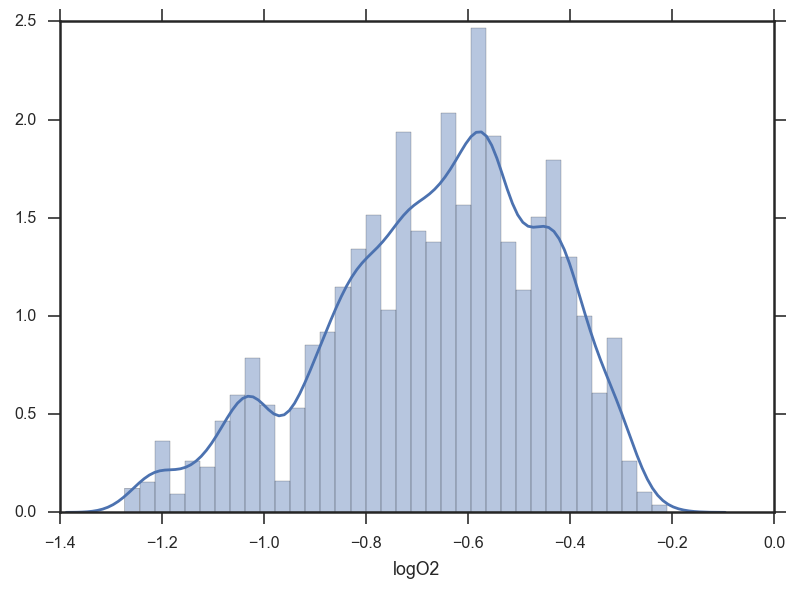

In [58]:
sns.distplot(total_vdf.logO2[total_vdf.m_val ==74])

In [59]:
m =74
ws = np.load("../sf/m{:03d}/output/mix_emcee/run01/emcee_chain.npy".format(m))
gi = ws[0,:,0] != 0.0
#print("Order {}: {} samples".format(m, gi.sum()))
ws = ws[:,gi,:]
burned = ws[:, -1*n_s:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
bb = 10**fc[:,7] / ( 10**fc[:,5] + 10**fc[:,7] )

In [36]:
total_vdf.m_val.unique().shape

(48,)

## Teff1, Teff2, and fill factor

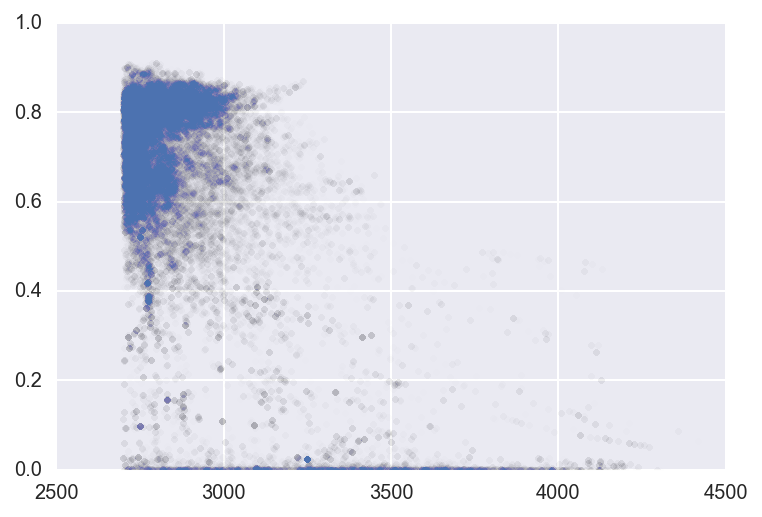

In [67]:
plt.plot(total_vdf.Teff2, total_vdf.ff, '.', alpha=0.002)

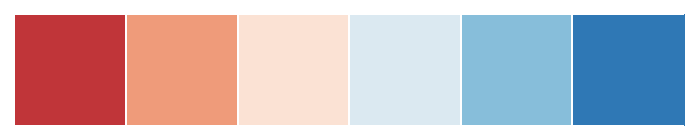

In [71]:
sns.palplot(sns.color_palette("RdBu"))

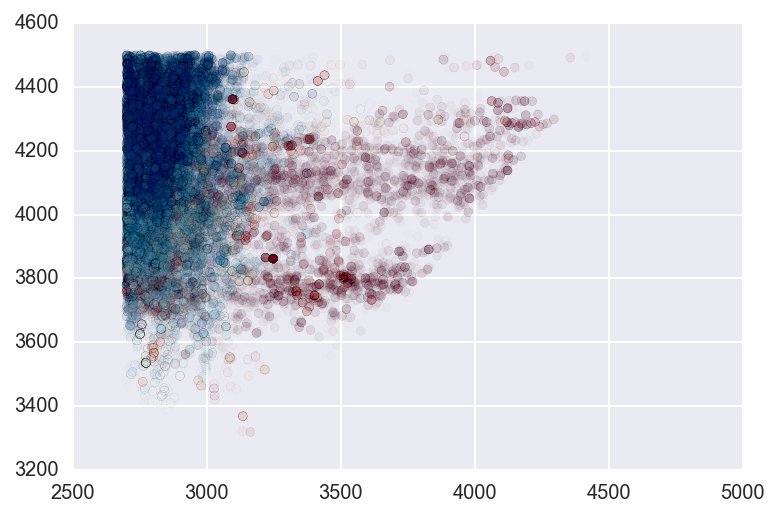

In [74]:
plt.scatter(total_vdf.Teff2, total_vdf.Teff, c=total_vdf.ff, cmap="RdBu", alpha=0.01)

In [ ]:
gi = total
plt.scatter(total_vdf.Teff2, total_vdf.Teff, c=total_vdf.ff, cmap="RdBu", alpha=0.01)

In [76]:
total_vdf['fillstate'] = ' '

In [77]:
total_vdf.ff.describe()

count    1.280000e+05
mean     6.096188e-01
std      2.619344e-01
min      1.541008e-20
25%      5.376459e-01
50%      6.976126e-01
75%      8.037310e-01
max      9.119550e-01
Name: ff, dtype: float64

In [78]:
lo = total_vdf.ff <0.537
q1_med = (total_vdf.ff >0.537) & (total_vdf.ff <0.697)
med_q3 = (total_vdf.ff >0.697) & (total_vdf.ff <0.8037)
hi = (total_vdf.ff >0.8037)

In [79]:
total_vdf.fillstate[lo] = 'low'
total_vdf.fillstate[q1_med] = 'second'
total_vdf.fillstate[med_q3] = 'third'
total_vdf.fillstate[hi] = 'hi'

//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:4: Sett

In [85]:
total_vdf.fillstate.unique()

array(['third', 'hi', 'second', 'low'], dtype=object)

//anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


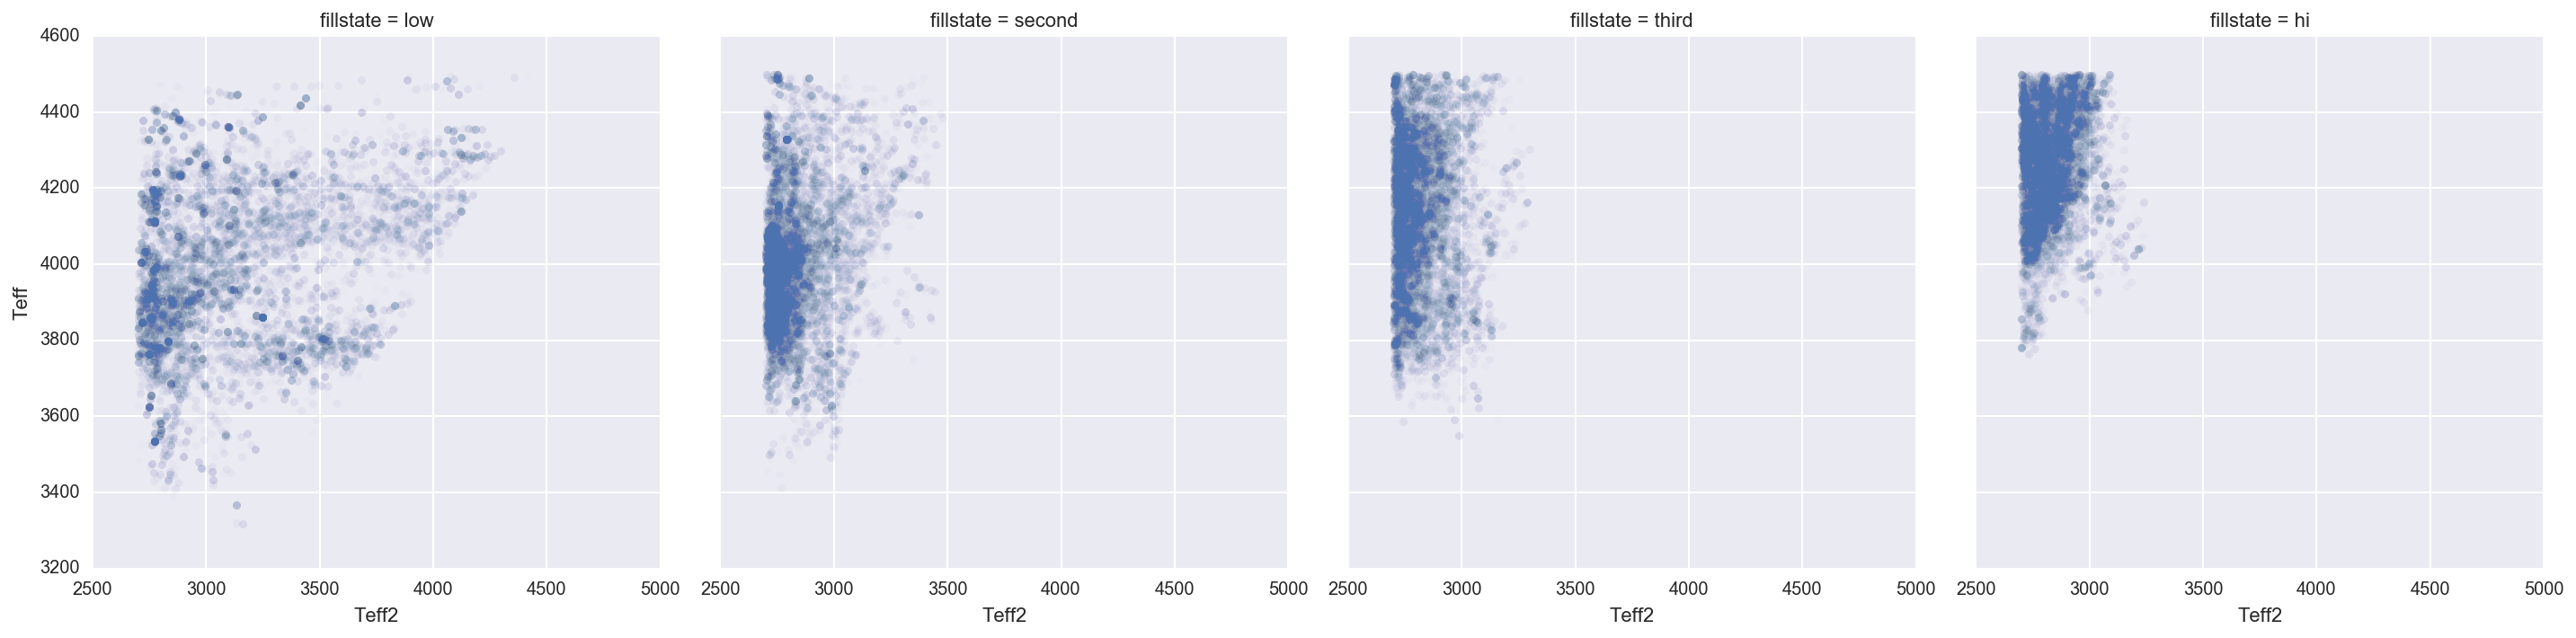

In [86]:
sns.lmplot(x="Teff2", y="Teff", col="fillstate", data=total_vdf, fit_reg=False, 
           col_order=['low','second', 'third', 'hi'],
           scatter_kws={"alpha":0.01});

Insights: The low fill factors can have almost any range in temperatures-- the ambient photosphere dominates.
The second quartile likes modest ambient photosphere Temperature (Teff ~3800-4000).  The third quartile prefers hotter effective temperatures (4000-4400).  The high fill factor likes the extreme hot temperature (4100-4500).

The end.